In [87]:
# DATA MUNGING
import pandas as pd
from pandas import DataFrame 
import numpy as np

# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

import plotnine as p9
from plotnine import *


In [53]:
# Loading the data
ds_salaries = pd.read_csv('Downloads/ds_salaries.csv', index_col = [0])
ds_salaries.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [58]:
# COLUMN DATA TYPES
ds_salaries.dtypes

work_year             object
experience_level      object
employment_type       object
job_title             object
salary                 int32
salary_currency       object
salary_in_usd          int32
employee_residence    object
remote_ratio           int32
company_location      object
company_size          object
dtype: object

In [59]:
# CHECK FOR PERCENT OF MISSING DATA
round((ds_salaries.isnull().mean()*100),2).astype(str)+'%'

work_year             0.0%
experience_level      0.0%
employment_type       0.0%
job_title             0.0%
salary                0.0%
salary_currency       0.0%
salary_in_usd         0.0%
employee_residence    0.0%
remote_ratio          0.0%
company_location      0.0%
company_size          0.0%
dtype: object

In [54]:
# Changing Data Types
ds_salaries = ds_salaries.astype({'work_year': str, 'experience_level': str, 'employment_type': str, 'job_title': str, 'salary': int, 'salary_currency': str, 'salary_in_usd': int, 'employee_residence': str, 'remote_ratio': int, 'company_location': str, 'company_size': str})

In [63]:
# DROP DUPLICATE ROWS WHILE KEEPING THE FIRST
ds_salaries.drop_duplicates(keep= 'first')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [66]:
#UNIQUE JOBS AND SORTING
unique_jobs = ds_salaries.job_title.unique()
unique_jobs.sort()

#COUNTING UNIQUE JOBS WITH ENUMERATE
for i, v in enumerate(unique_jobs):
        i += 1
        print('{0}: {1}'.format(i,v))

1: 3D Computer Vision Researcher
2: AI Scientist
3: Analytics Engineer
4: Applied Data Scientist
5: Applied Machine Learning Scientist
6: BI Data Analyst
7: Big Data Architect
8: Big Data Engineer
9: Business Data Analyst
10: Cloud Data Engineer
11: Computer Vision Engineer
12: Computer Vision Software Engineer
13: Data Analyst
14: Data Analytics Engineer
15: Data Analytics Lead
16: Data Analytics Manager
17: Data Architect
18: Data Engineer
19: Data Engineering Manager
20: Data Science Consultant
21: Data Science Engineer
22: Data Science Manager
23: Data Scientist
24: Data Specialist
25: Director of Data Engineering
26: Director of Data Science
27: ETL Developer
28: Finance Data Analyst
29: Financial Data Analyst
30: Head of Data
31: Head of Data Science
32: Head of Machine Learning
33: Lead Data Analyst
34: Lead Data Engineer
35: Lead Data Scientist
36: Lead Machine Learning Engineer
37: ML Engineer
38: Machine Learning Developer
39: Machine Learning Engineer
40: Machine Learning In

In [108]:
# RATIO COUNTS 
print('Ratio: Count:')
remote_ratio_counts = ds_salaries['remote_ratio'].value_counts()
print(remote_ratio_counts)
print('')
print('')
print("	The overall amount of work done remotely, possible values are as follows: \n 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)")

Ratio: Count:
100    381
0      127
50      99
Name: remote_ratio, dtype: int64


	The overall amount of work done remotely, possible values are as follows: 
 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)


In [103]:
# NUMBER OF COMPANIES 
print('Exper: Count:')
experience_level_counts = ds_salaries['experience_level'].value_counts()
print(experience_level_counts)
print('')
print('')
print("	The experience level in the job during the year with the following possible values:\n EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level")

Exper: Count:
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64


	The experience level in the job during the year with the following possible values:
 EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level


In [70]:
# AVERAGE SALARIES BY YEAR 
avgyearly_salaries = round(ds_salaries.groupby('work_year').salary_in_usd.mean(),2)
print(avgyearly_salaries)

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64


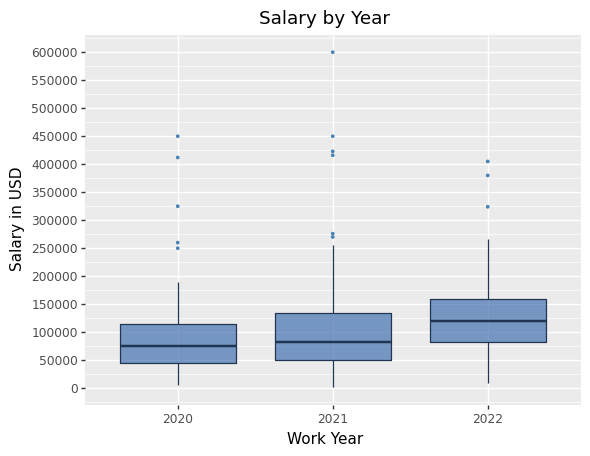

In [71]:
# BOX CHART FOR SALARY(USD) IN YEARS
p101 = (
    ggplot(ds_salaries, aes("work_year","salary_in_usd" ))
    + geom_boxplot(
        colour="#1F3552",
        fill="#4271AE",
        alpha=0.7,
        outlier_shape=".",
        outlier_colour="steelblue",
    )
    + xlab("Work Year")
    + ylab("Salary in USD")
    + scale_y_continuous(breaks=np.arange(0, 600001, 50000),
                        limits=[0,600000])
    + ggtitle("Salary by Year")
)
print(p101)

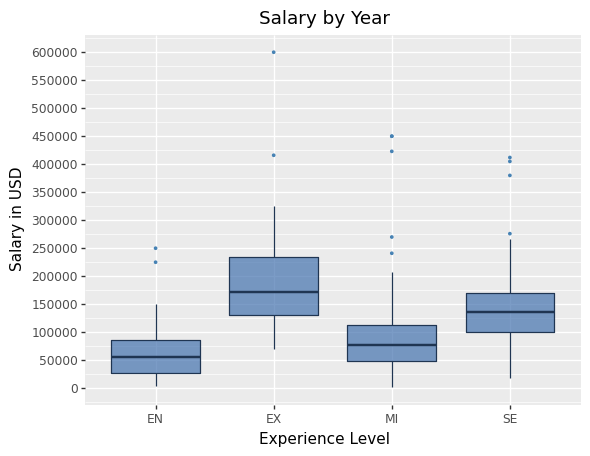


	The experience level in the job during the year with the following possible values:
 EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level


In [65]:
# BOX CHART FOR SALARY(USD) BY EXPERIENCE LEVEL

p111 = (
    ggplot(ds_salaries, aes("experience_level","salary_in_usd" ))
    + geom_boxplot(
        colour="#1F3552",
        fill="#4271AE",
        alpha=0.7,
        outlier_shape=".",
        outlier_colour="steelblue",
    )
    + xlab("Experience Level")
    + ylab("Salary in USD")
    + scale_y_continuous(breaks=np.arange(0, 600001, 50000),
                        limits=[0,600000])
    + ggtitle("Salary by Experience Level")
)
print(p111)

print("	The experience level in the job during the year with the following possible values:\n EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level")

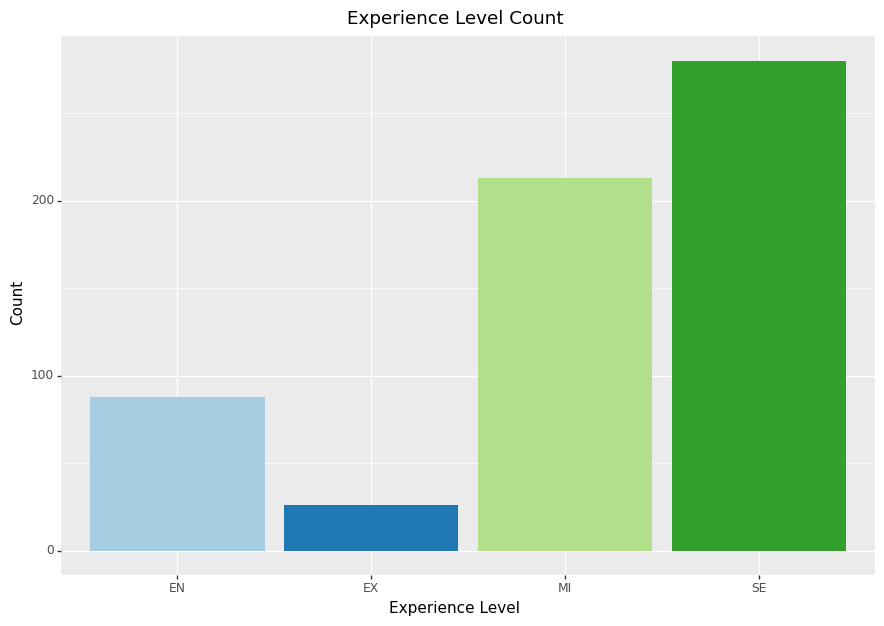

<ggplot: (121076204897)>

In [77]:
# EXPERIENCE LEVEL COUNTS
p9.options.figure_size = (10.5, 7)
(ggplot(ds_salaries) 
    + geom_bar(aes(x='experience_level', fill = 'experience_level'), show_legend= False)
    + xlab("Experience Level")
    + ylab("Count")
    + ggtitle('Experience Level Count')
    + scale_fill_brewer(type='qual', palette= 3))

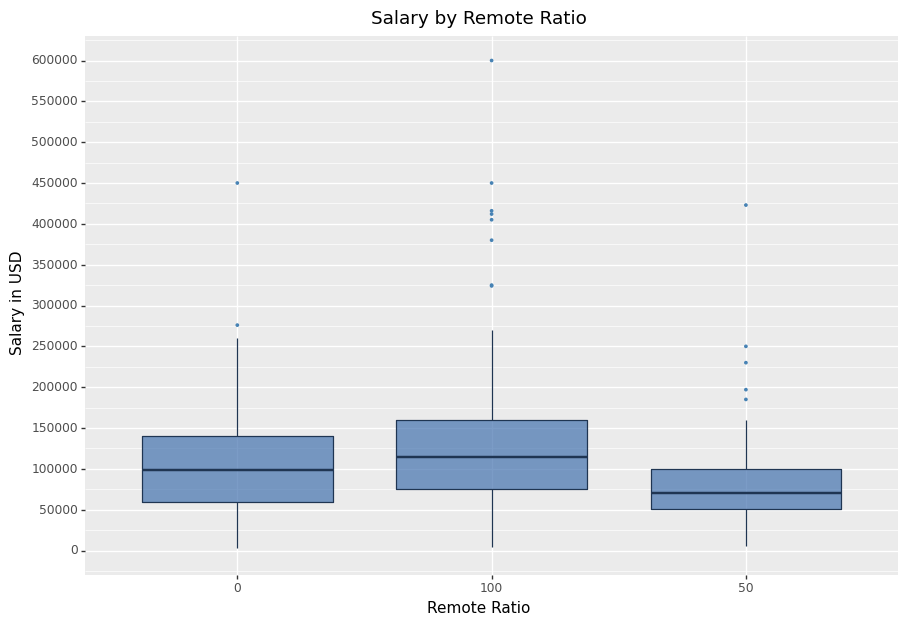


The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).


In [91]:
# Salaries by Remote Ratio
ds_salaries = ds_salaries.astype({'remote_ratio': str}) # First change to int for better seperation

p112 = (
    ggplot(ds_salaries, aes("remote_ratio","salary_in_usd" ))
    + geom_boxplot(
        colour="#1F3552",
        fill="#4271AE",
        alpha=0.7,
        outlier_shape=".",
        outlier_colour="steelblue",
    )
    + xlab("Remote Ratio")
    + ylab("Salary in USD")
    + scale_y_continuous(breaks=np.arange(0, 600001, 50000),
                        limits=[0,600000])
    + ggtitle("Salary by Remote Ratio")
)
print(p112)

print("The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).")